In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('tvmarketing.csv')

### 1. Import dataset and display first 5 rows

In [3]:
print(df.head(5))

      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9


### 2. Check column data types

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB
None


### 3. Check the shape of the Data Frame (rows, columns)

In [5]:
r=df.shape[0]
print("No.of Rows :",r)
c=df.shape[1]
print("No.of Columns : ",c)

No.of Rows : 200
No.of Columns :  2


### 4. Look at summary statistics

In [6]:
print(df.describe())

               TV       Sales
count  200.000000  200.000000
mean   147.042500   14.022500
std     85.854236    5.217457
min      0.700000    1.600000
25%     74.375000   10.375000
50%    149.750000   12.900000
75%    218.825000   17.400000
max    296.400000   27.000000


###  5. Visualize the relationship between the features and the dependent variable using scatterplots

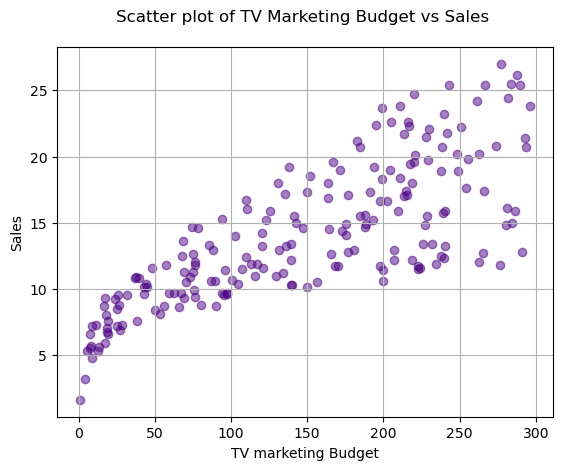

In [7]:
plt.scatter(df["TV"],df["Sales"],color='indigo',alpha=0.5)
plt.xlabel("TV marketing Budget")
plt.ylabel("Sales")
plt.title("Scatter plot of TV Marketing Budget vs Sales \n ")
plt.grid(True) # Optional
plt.show()

### 6. Preparing feature (X) and response variable (y)

In [8]:
X = df[["TV"]]
y = df["Sales"]

### 7. Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

### 8. Print the shape of train data and test data

In [11]:
print("Training Data shape : ",X_train.shape,y_train.shape)
print("Testing data Shape : ",X_test.shape,y_test.shape)

Training Data shape :  (140, 1) (140,)
Testing data Shape :  (60, 1) (60,)


### 9. Perform Linear Regression (on train data) without using any library and print the coefficients values

In [12]:
x_m = X_train["TV"].mean()
y_m = y_train.mean()
num = ((X_train["TV"]-x_m)*(y_train-y_m)).sum()  # summation(Xi-Xbar)(Yi=Ybar)
den=((X_train["TV"]-x_m) ** 2).sum()             # summation(Xi-Xbar)**2
m=num/den
print("Slope is(m) : ",m)
b=y_m-(m*x_m)
print("SLR (b)= ",b)

Slope is(m) :  0.04663727513906575
SLR (b)=  7.018216863060295


### 10.Create the model using the calculated coefficients and make predictions on the testing set

In [13]:
y_pred=m*X_test["TV"]+b
print(y)

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


### 11.Perform Linear Regression using library(sklearn)

In [14]:
from sklearn.linear_model import LinearRegression

l= LinearRegression()
l.fit(X_train, y_train)

LinearRegression()

### 12.Print the intercept and coefficients

In [15]:
print("Sklearn Linear Regression Coefficients:")
print("Intercept:", l.intercept_)
print("Slope:", l.coef_[0])

Sklearn Linear Regression Coefficients:
Intercept: 7.018216863060299
Slope: 0.04663727513906573


### 13.Make predictions on the testing set - y_pred

In [16]:
y_pred=l.predict(X_test)
print(y_pred[:5])

[12.88052235 20.10929999  9.09357561  7.56387298 18.36040218]


### 14.Plot train data and the model

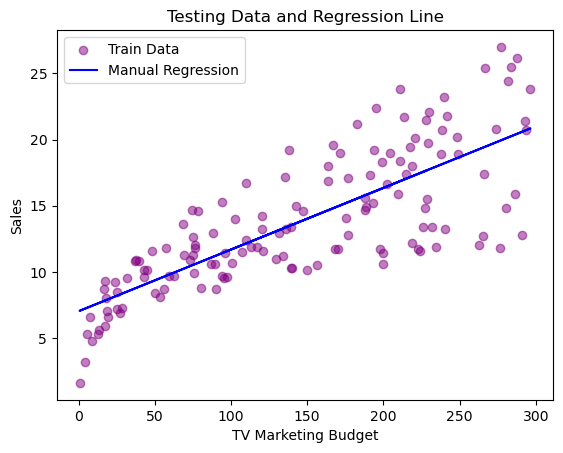

In [17]:
plt.scatter(X_train,y_train,color='purple',alpha=0.5,label='Train Data')
plt.plot(X_train,m*X_train+b,color='blue',label='Manual Regression')
plt.xlabel("TV Marketing Budget")
plt.ylabel("Sales")
plt.title("Testing Data and Regression Line")
plt.legend()
plt.show()

### 15.Plot test data and the model

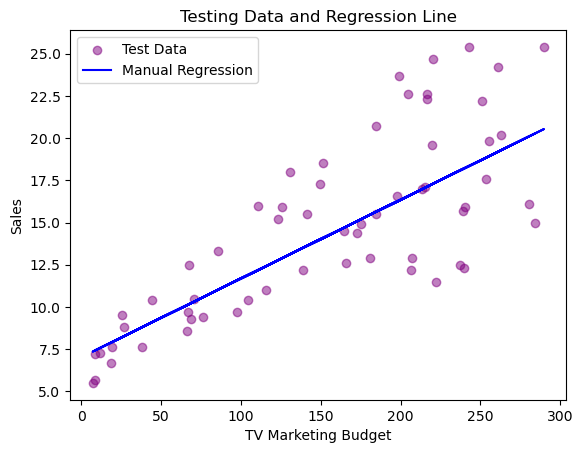

In [18]:
plt.scatter(X_test,y_test,color='purple',alpha=0.5,label='Test Data')
plt.plot(X_test,m*X_test+b,color='blue',label='Manual Regression')
plt.xlabel("TV Marketing Budget")
plt.ylabel("Sales")
plt.title("Testing Data and Regression Line")
plt.legend()
plt.show()

### 16.Print Mean Squared Error and R Squared Value

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R Squared Value:", r2)


Mean Squared Error: 11.2466594510683
R Squared Value: 0.5999662288617331


### 17.Calculate and print R Squared and Adjusted R Squared values without any library

In [20]:

ssr= ((y_pred - y_m) ** 2).sum()
sst= ((y_test - y_m) ** 2).sum()
r2_m= ssr/ sst
print("R squared value is :",r2_m)
n=len(y_test)
nu=(1-r2_m)*(n - 1)
k=X_test.shape[1]
de=n-k-1
t=nu/de
adjr2=1-t
print("Adjusted R Squared value is :",adjr2)

R squared value is : 0.536435972789075
Adjusted R Squared value is : 0.5284434895613004
